# Import library

In [49]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage, ward
from scipy.spatial.distance import pdist, squareform

In [50]:
# Dataset URL (raw GitHub)
DATA_URL = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"

df = pd.read_csv(DATA_URL)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


## Part A — Data Preprocessing

**Tasks:** Load dataset, inspect shape/info, check missing values, and view unique values for each column. Interpretations will be provided in English.

In [51]:
# Load dataset
df = pd.read_csv(DATA_URL)
print('Shape:', df.shape)
df.head()

Shape: (308, 12)


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [52]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [54]:
# Missing values
print('\n--- Missing values per column ---')
df.isnull().sum()


--- Missing values per column ---


Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

In [55]:
# Unique values per column (for categorical understanding)
for col in df.columns:
    print(f"\nColumn: {col} — unique values (up to 30):")
    try:
        print(df[col].value_counts(dropna=False).head(30))
    except Exception as e:
        print('Could not display value counts:', e)


Column: Area Category — unique values (up to 30):
Area Category
Standard          140
Premium           106
Below Standard     36
Sangat Premium     26
Name: count, dtype: int64

Column: Nama Daerah — unique values (up to 30):
Nama Daerah
Citraland           34
Gubeng              19
Mulyorejo           18
Pakuwon City        16
Wiyung              11
Rungkut              9
Kenjeran             8
Manyar               8
Tegalsari            6
Gayungan             6
Graha Family         6
Sukolilo             6
Tambaksari           5
Sawahan              4
Petemon              4
Darmo                3
Jambangan            3
Manyar Tirtoasri     3
Wonocolo             3
Ketintang            3
Klampis Ngasem       3
Gununganyar          3
Medokan Ayu          3
Pantai Mentari       2
Setro Baru Utara     2
Darmo Permai         2
Pakuwon Indah        2
Sukomanunggal        2
Manyar               2
Araya                2
Name: count, dtype: int64

Column: Luas Tanah (m2) — unique values (up

### Interpretation

- After loading the dataset, inspect the shape and info() output to understand types and missingness.  
- Report any columns with missing or obviously inconsistent values and decide on an approach (imputation or removal).  
- For categorical columns, list unique values to detect typos or category fragmentation.  

In [56]:
# General cleaning steps (example). Adjust based on actual missingness/type issues observed above.
df_clean = df.copy()

# Example: drop rows with missing target 'Harga Penawaran (dari Owner)' if present
target_col = None
for candidate in ['Harga Penawaran (dari Owner)', 'Harga Penawaran', 'Harga']:
    if candidate in df_clean.columns:
        target_col = candidate
        break

if target_col:
    print('Using target column:', target_col)
    df_clean = df_clean.dropna(subset=[target_col]).reset_index(drop=True)

# For categorical columns: fill missing with 'Unknown' (simple approach)
cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
# exclude columns that might be identifiers if needed
for c in cat_cols:
    df_clean[c] = df_clean[c].fillna('Unknown')

# For numeric columns: fill missing with median
num_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())

print('After basic imputation, missing values:')
df_clean.isnull().sum()

# Show a few rows after cleaning
df_clean.head()

Using target column: Harga Penawaran (dari Owner)
After basic imputation, missing values:


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


## Part B — Exploratory Data Analysis (EDA)

Create at least two insightful visualizations and provide English interpretations below each figure.

Detected columns -> price: Harga Penawaran (dari Owner) , land: Luas Tanah (m2) , building: Luas Bangunan (m2)


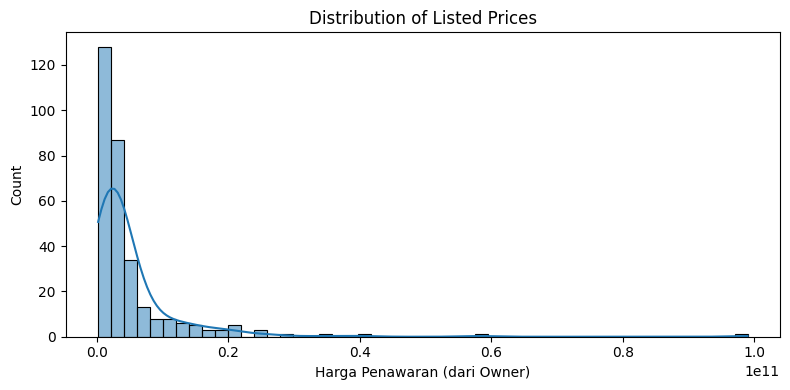

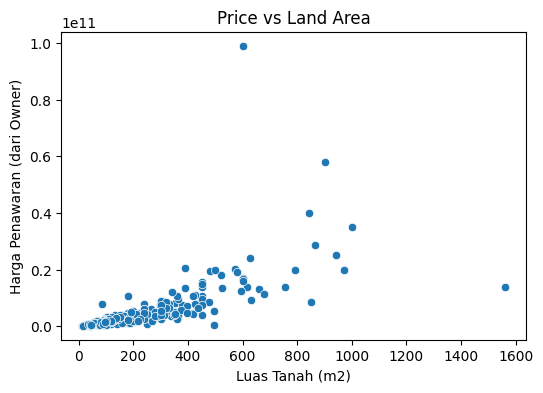

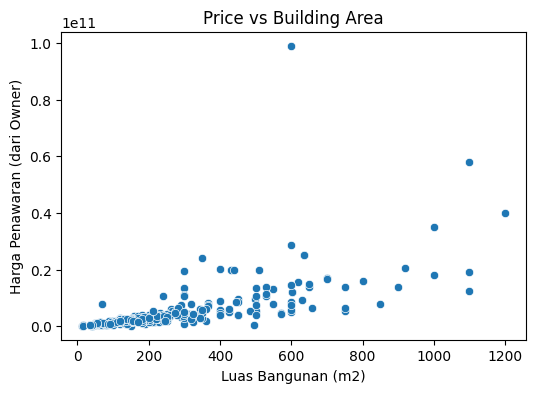

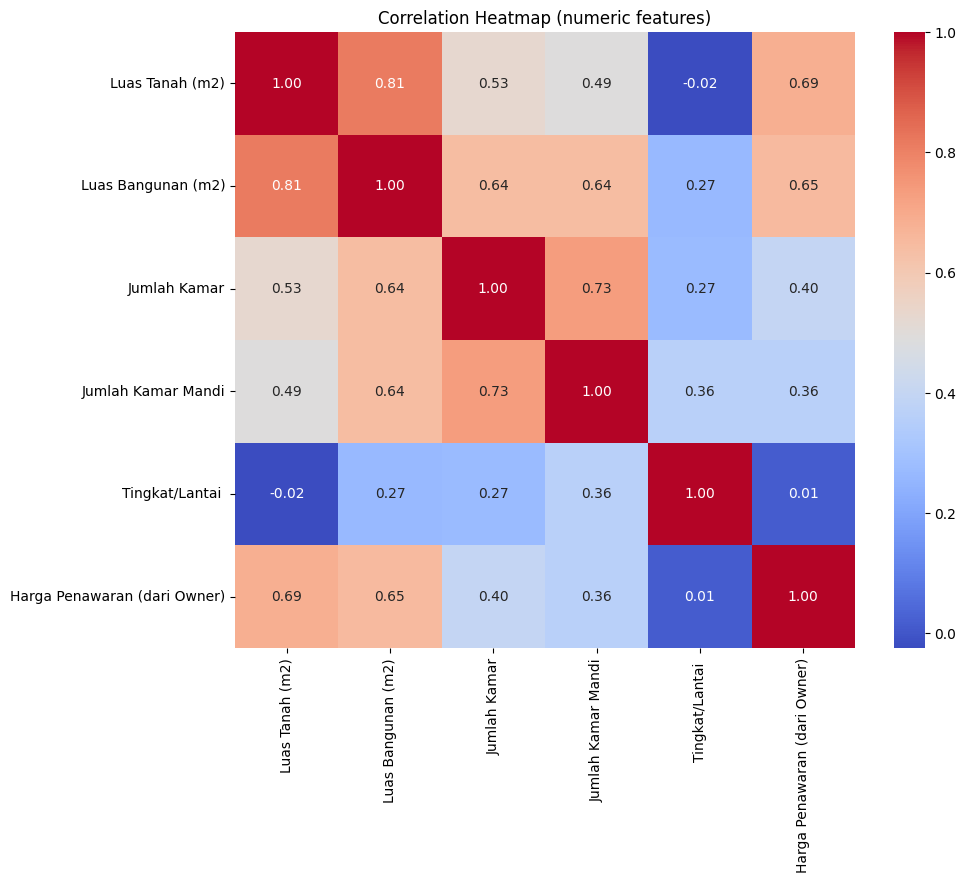

In [57]:
# Detect price column and numeric area columns
price_col = None
for c in df_clean.columns:
    if 'Harga' in c or 'harga' in c or 'Price' in c or 'price' in c:
        price_col = c
        break

land_col = None
bld_col = None
for c in df_clean.columns:
    if 'Luas Tanah' in c or 'Tanah' in c or 'luas_tanah' in c:
        land_col = c
    if 'Luas Bangunan' in c or 'Bangunan' in c or 'luas_bangunan' in c:
        bld_col = c

print('Detected columns -> price:', price_col, ', land:', land_col, ', building:', bld_col)

# Plot 1: Price distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
if price_col:
    sns.histplot(df_clean[price_col].dropna(), bins=50, kde=True)
    plt.title('Distribution of Listed Prices')
    plt.xlabel(price_col)
    plt.ylabel('Count')
else:
    plt.text(0.2,0.5,'Price column not detected', fontsize=12)
plt.tight_layout()
plt.show()

# Plot 2: Scatter Price vs Land and Price vs Building
if land_col and price_col:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_clean[land_col], y=df_clean[price_col])
    plt.title('Price vs Land Area')
    plt.show()

if bld_col and price_col:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_clean[bld_col], y=df_clean[price_col])
    plt.title('Price vs Building Area')
    plt.show()

# Correlation heatmap
num_df = df_clean.select_dtypes(include=[np.number])
if num_df.shape[1] >= 2:
    plt.figure(figsize=(10,8))
    sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap (numeric features)')
    plt.show()

### Interpretation 

- Price distribution: Comment on skewness and outliers.  
- Price vs Land/Building: Comment on correlation patterns observed in scatter plots.  
- Heatmap: Indicate high correlations that might suggest multicollinearity.

*(Add concrete statements after running the notebook and viewing figures.)*

## Part C — Data Preparation & Silhouette Analysis

Encode categorical variables, scale features, and compute silhouette scores across parameter combinations.

In [58]:
# Prepare features for clustering
df_model = df_clean.copy()

# Identify numeric and categorical columns
numeric_features = df_model.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_model.select_dtypes(include=['object']).columns.tolist()

print('Numeric features:', numeric_features)
print('Categorical features (sample):', categorical_features[:10])

# Choose categorical columns with limited unique values for one-hot encoding
cat_to_encode = [c for c in categorical_features if df_model[c].nunique() <= 10]
print('Categorical features to encode:', cat_to_encode)

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_to_encode)
], remainder='drop')

X_pre = preprocessor.fit_transform(df_model)
print('Transformed feature matrix shape:', X_pre.shape)

Numeric features: ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Tingkat/Lantai ', 'Harga Penawaran (dari Owner)']
Categorical features (sample): ['Area Category', 'Nama Daerah', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']
Categorical features to encode: ['Area Category', 'Terjual/Belum', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']
Transformed feature matrix shape: (308, 23)


,linkage,metric,n_clusters,silhouette
0,average,euclidean,2,0.700443
1,complete,euclidean,2,0.700443
2,single,euclidean,2,0.700443
3,single,manhattan,2,0.581694
4,average,manhattan,2,0.581694
5,single,euclidean,3,0.570034
6,average,euclidean,3,0.537238
7,single,euclidean,4,0.533913
8,average,euclidean,4,0.514807
9,single,euclidean,6,0.499609


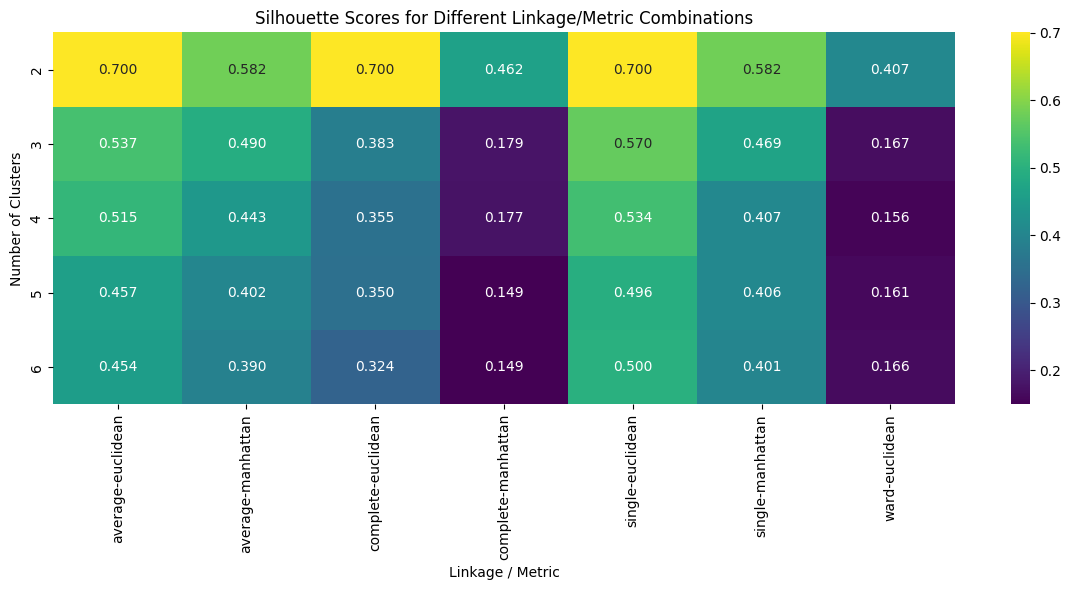

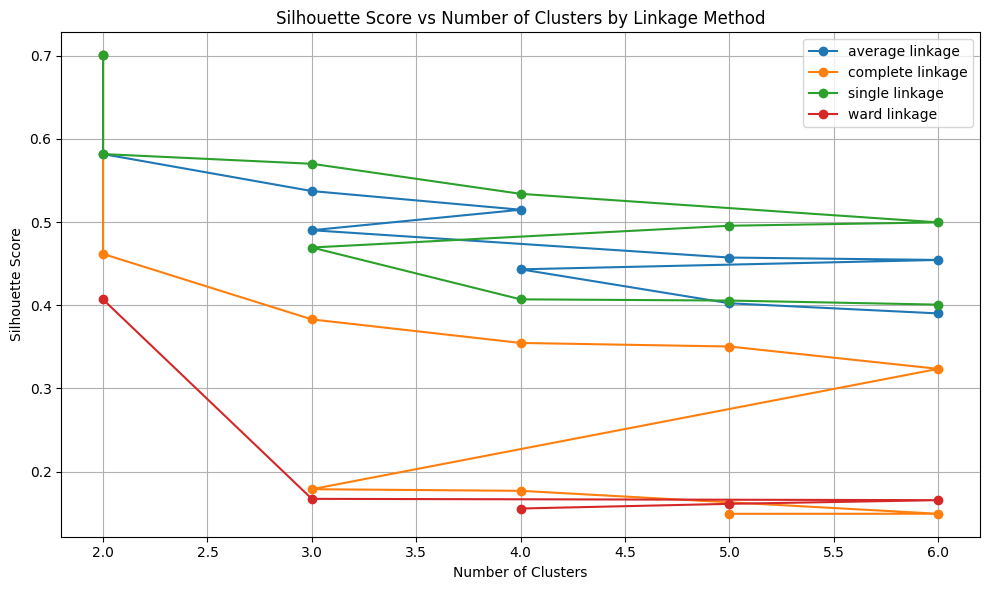

\n✅ Best combination found:
linkage         average
metric        euclidean
n_clusters            2
silhouette     0.700443
Name: 0, dtype: object


In [68]:
from itertools import product
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

linkages = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']
n_clusters_list = [2, 3, 4, 5, 6]

results = []

# Loop untuk semua kombinasi parameter
for linkage_method, metric, n_clusters in product(linkages, metrics, n_clusters_list):
    if linkage_method == 'ward' and metric != 'euclidean':
        continue
    try:
        model = AgglomerativeClustering(
            n_clusters=n_clusters,
            linkage=linkage_method,
            metric=metric if linkage_method != 'ward' else 'euclidean'
        )
        labels = model.fit_predict(X_pre)
        score = silhouette_score(
            X_pre, labels,
            metric=metric if linkage_method != 'ward' else 'euclidean'
        )
        results.append({
            'linkage': linkage_method,
            'metric': metric,
            'n_clusters': n_clusters,
            'silhouette': score
        })
    except Exception as e:
        results.append({
            'linkage': linkage_method,
            'metric': metric,
            'n_clusters': n_clusters,
            'silhouette': np.nan,
            'error': str(e)
        })

# Buat DataFrame hasil
results_df = pd.DataFrame(results).sort_values('silhouette', ascending=False).reset_index(drop=True)
display(results_df.head(20))

# 🔹 Visualisasi 1: heatmap kombinasi parameter
pivot = results_df.pivot_table(index='n_clusters', columns=['linkage','metric'], values='silhouette')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.3f', cmap='viridis')
plt.title('Silhouette Scores for Different Linkage/Metric Combinations')
plt.xlabel('Linkage / Metric')
plt.ylabel('Number of Clusters')
plt.tight_layout()
plt.show()

# 🔹 Visualisasi 2: line plot per linkage (lebih mudah dibaca)
plt.figure(figsize=(10,6))
for link in results_df['linkage'].unique():
    subset = results_df[results_df['linkage'] == link]
    plt.plot(subset['n_clusters'], subset['silhouette'], marker='o', label=f'{link} linkage')

plt.title('Silhouette Score vs Number of Clusters by Linkage Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔹 Cetak kombinasi terbaik
best = results_df.loc[results_df['silhouette'].idxmax()]
print("\\n✅ Best combination found:")
print(best)


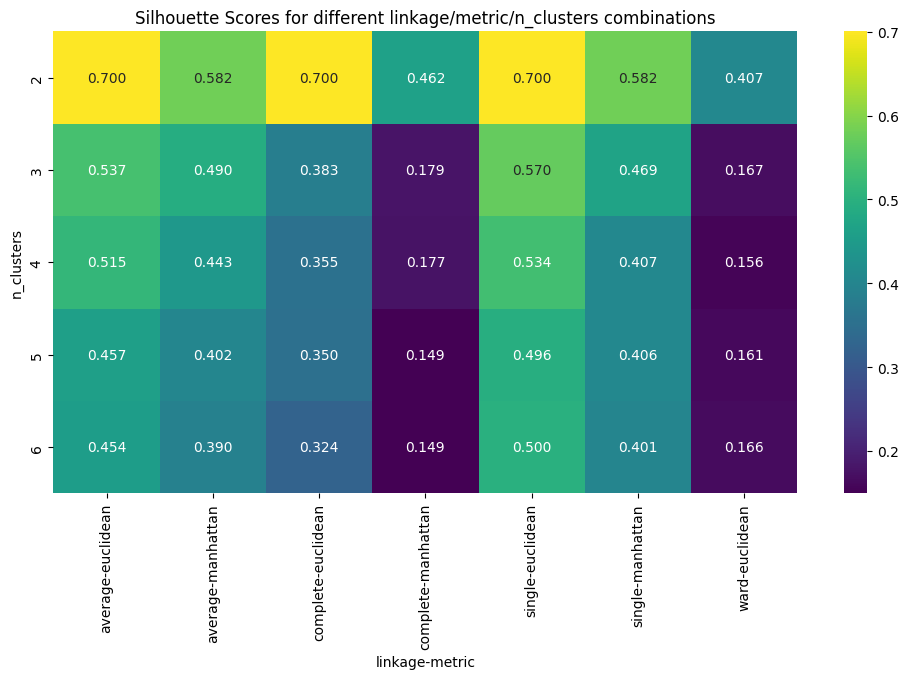

Best combination:


linkage         average
metric        euclidean
n_clusters            2
silhouette     0.700443
Name: 0, dtype: object

In [60]:
# Plot results as heatmap
pivot = results_df.pivot_table(index='n_clusters', columns=['linkage','metric'], values='silhouette')
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='.3f', cmap='viridis')
plt.title('Silhouette Scores for different linkage/metric/n_clusters combinations')
plt.show()

best = results_df.loc[results_df['silhouette'].idxmax()]
print('Best combination:') 
best

### Interpretation

- Use the printed 'Best combination' as Model 1 parameters in Part D.  
- Note caveats: silhouette may be influenced by scaling and included features. Consider experimenting by removing skewed features or log-transforming price.

## Part D — Hierarchical Clustering Modeling

Build two models using parameters from Part C: Model 1 (best) and Model 2 (ward with same n_clusters). Visualize dendrograms and merge cluster labels.

Best params -> average euclidean 2


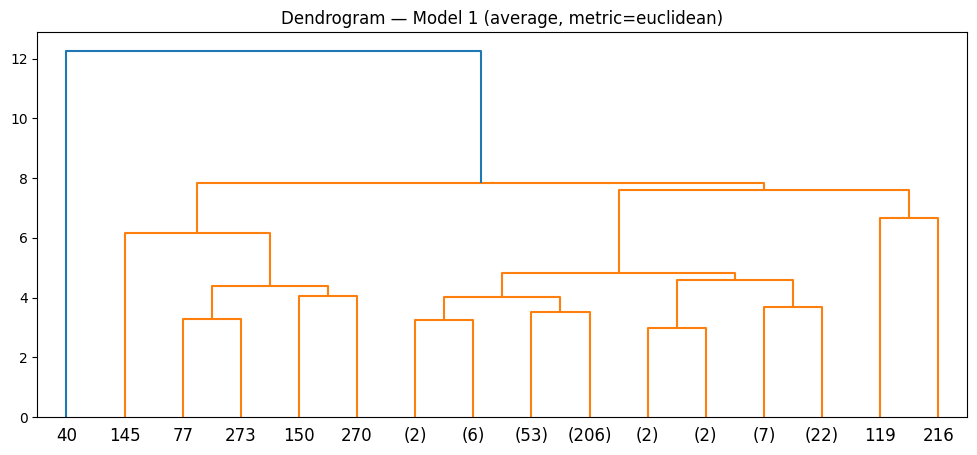

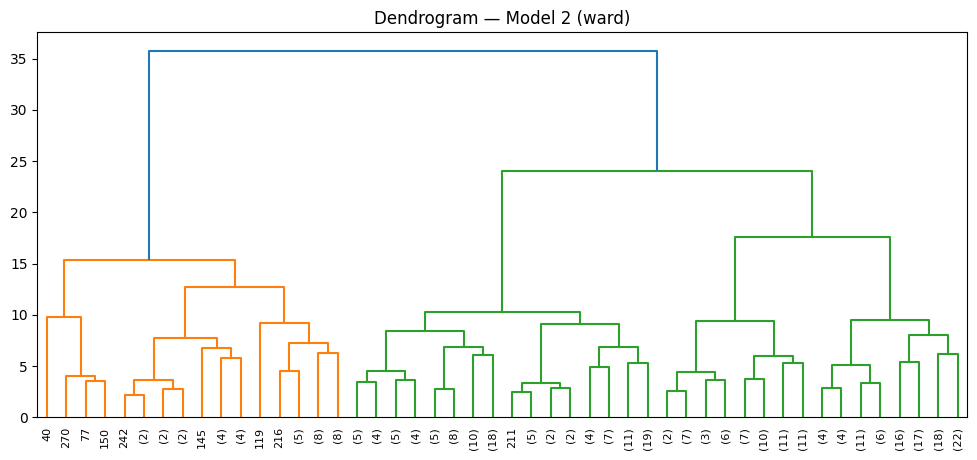

Model 1 cluster counts:


cluster_model1
0    307
1      1
Name: count, dtype: int64

In [61]:
# Use best params
best_params = best.to_dict()
best_linkage = best_params['linkage']
best_metric = best_params['metric']
best_n = int(best_params['n_clusters'])

print('Best params ->', best_linkage, best_metric, best_n)

# Build dendrograms
from scipy.cluster.hierarchy import linkage, dendrogram, ward
from scipy.spatial.distance import pdist

# Model 1 dendrogram
Z1 = linkage(X_pre, method=best_linkage, metric=best_metric if best_linkage!='ward' else 'euclidean')
plt.figure(figsize=(12,5))
plt.title(f'Dendrogram — Model 1 ({best_linkage}, metric={best_metric})')
dendrogram(Z1, truncate_mode='level', p=5)
plt.show()

# Model 2 dendrogram (ward)
Z2 = ward(X_pre)
plt.figure(figsize=(12,5))
plt.title('Dendrogram — Model 2 (ward)')
dendrogram(Z2, truncate_mode='level', p=5)
plt.show()

# Fit AgglomerativeClustering for both models
model1 = AgglomerativeClustering(n_clusters=best_n, linkage=best_linkage, metric=best_metric if best_linkage!='ward' else 'euclidean')
labels1 = model1.fit_predict(X_pre)

model2 = AgglomerativeClustering(n_clusters=best_n, linkage='ward', metric='euclidean')
labels2 = model2.fit_predict(X_pre)

df_clustered = df_clean.copy().reset_index(drop=True)
df_clustered['cluster_model1'] = labels1
df_clustered['cluster_model2'] = labels2

# Show counts
print('Model 1 cluster counts:')
df_clustered['cluster_model1'].value_counts().sort_index()

In [62]:
print('Model 2 cluster counts:')
df_clustered['cluster_model2'].value_counts().sort_index()

Model 2 cluster counts:


cluster_model2
0    265
1     43
Name: count, dtype: int64

In [63]:
# Save clustered results
out_path = 'W09_clustered_results_0706022310031.csv'
df_clustered.to_csv(out_path, index=False)
out_path

'W09_clustered_results_0706022310031.csv'

## Part E — Comparison & Interpretation

Compare cluster sizes, cluster means for numeric features, and provide managerial insights.

In [64]:
# Distribution per cluster
print('Model 1 distribution:')
display(df_clustered.groupby('cluster_model1').size())

print('\nModel 2 distribution:')
display(df_clustered.groupby('cluster_model2').size())

Model 1 distribution:


cluster_model1
0    307
1      1
dtype: int64


Model 2 distribution:


cluster_model2
0    265
1     43
dtype: int64

In [65]:
# Cluster summary (means)
print('Model 1 cluster means (numeric):')
display(df_clustered.select_dtypes(include=[np.number]).groupby(df_clustered['cluster_model1']).mean())

print('\nModel 2 cluster means (numeric):')
display(df_clustered.select_dtypes(include=[np.number]).groupby(df_clustered['cluster_model2']).mean())

Model 1 cluster means (numeric):


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),cluster_model1,cluster_model2
cluster_model1,,,,,,,,
0,225.736156,265.602606,4.267101,3.332248,1.843648,4.708159e+09,0.0,0.136808
1,600.000000,600.000000,7.000000,5.000000,1.000000,9.900000e+10,1.0,1.000000



Model 2 cluster means (numeric):


,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),cluster_model1,cluster_model2
cluster_model2,,,,,,,,
0,164.445283,203.581132,3.928302,3.045283,1.822642,2.830867e+09,0.000000,0.0
1,612.162791,655.604651,6.418605,5.139535,1.953488,1.847035e+10,0.023256,1.0
